## Proyecto Final Series de Tiempo

Equipo:
1. a
2. b
3. c
4. d
5. e


### Preguntas a resolver: 


1. 
2. 
3. 

### Analísis exploratorio de datos

Pasos a realizar para el analisis exploratorio. 

1. Visualizacion de diccionarios
2. 
3. 
4. 
5. 
6. 
7.

In [42]:
#Librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

In [43]:
inventory_data_dictionary = pd.read_csv('./Data Dictionary/inventory_data_dictionary.csv')
products_data_dictionary = pd.read_csv('./Data Dictionary/products_data_dictionary.csv')
sales_data_dictionary = pd.read_csv('./Data Dictionary/sales_data_dictionary.csv')
stores_data_dictionary = pd.read_csv('./Data Dictionary/stores_data_dictionary.csv')

In [44]:
inventory = pd.read_csv('inventory.csv')
products = pd.read_csv('products.csv')
sales = pd.read_csv('sales.csv')
stores = pd.read_csv('stores.csv')

In [45]:
#¿Cuantos registros de productos existen en el dataset?
products = pd.read_csv('./products.csv')
print('¿Cuantos registros de productos existen en el dataset?')
print(products.shape[0])
print('')
#¿Cuantos registros de ventas existen en el dataset?
sales = pd.read_csv('./sales.csv')
print('¿Cuantos registros de ventas existen en el dataset?')
print(sales.shape[0])
print('')  
#¿Cuantos registros de inventario existen en el dataset?
inventory = pd.read_csv('./inventory.csv')
print('¿Cuantos registros de inventario existen en el dataset?')
print(inventory.shape[0])
print('')
#¿Cuantos registros de tiendas existen en el dataset?
stores = pd.read_csv('./stores.csv')
print('¿Cuantos registros de tiendas existen en el dataset?')
print(stores.shape[0])

¿Cuantos registros de productos existen en el dataset?
35

¿Cuantos registros de ventas existen en el dataset?
829262

¿Cuantos registros de inventario existen en el dataset?
1593

¿Cuantos registros de tiendas existen en el dataset?
50


In [46]:
#¿Cual es la temporada con mas ventas?
# Convertir la columna de fecha a datetime y extraer el trimestre
sales['Quarter'] = pd.to_datetime(sales['Date']).dt.quarter

# Agrupar los datos por trimestre y sumar las ventas
quarterly_sales = sales.groupby('Quarter')['Units'].sum()

print('De quartely_sales, ¿Cual es el trimestre con mas ventas?')

# Imprimir el resultado
print(quarterly_sales)

De quartely_sales, ¿Cual es el trimestre con mas ventas?
Quarter
1    295320
2    334909
3    295259
4    165077
Name: Units, dtype: int64


In [47]:
#unir los datasets sales.csv y products.csv por la columna Product_ID
sales_products = pd.merge(products, sales, on='Product_ID')

In [48]:
#sumar las ventas por Product_Name y ordenar de mayor a menor
sales_by_product = sales_products.groupby('Product_Name')['Units'].sum().sort_values(ascending=False)

In [49]:
#agregar nombre a la columna sales_by_product Product_Name y Units y ordenar de mayor a menor
sales_by_product = sales_products.groupby('Product_Name')['Units'].sum().sort_values(ascending=False).reset_index(name='Units')

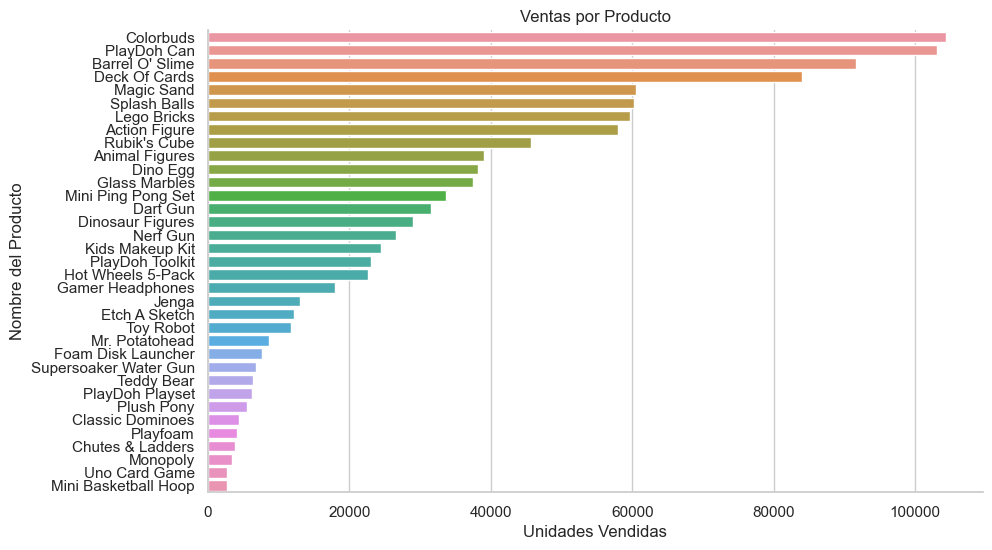

In [50]:
# Select the column names representing units sold and product name
units_sold = sales_by_product['Units']
product_names = sales_by_product['Product_Name']

# Create a horizontal bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=units_sold, y=product_names)
plt.title('Ventas por Producto')
plt.xlabel('Unidades Vendidas')
plt.ylabel('Nombre del Producto')

# Customize the plot appearance
sns.set(style='whitegrid')
sns.despine()

# Show the plot
plt.show()

### TODO: 

3. __Clasificación de márgenes de beneficio:__ Puedes utilizar la diferencia entre el costo del producto y el precio de venta para calcular el margen de beneficio. Luego, utilizando características adicionales, como la categoría del producto o la ubicación de la tienda, puedes construir un modelo de clasificación para clasificar los productos en diferentes rangos de márgenes de beneficio (por ejemplo, alto, medio, bajo).
4. __Identificación de productos con precios fuera de lo común:__ Puedes utilizar el costo y el precio de venta de los productos para detectar aquellos que tienen un precio inusualmente alto o bajo en comparación con otros productos de la misma categoría. Esto podría ayudarte a identificar productos que podrían necesitar un ajuste de precios.
5. __Predicción de demanda basada en precios:__ Utilizando el costo y el precio de venta, junto con otras características relevantes como la categoría del producto, puedes construir un modelo de clasificación o regresión para predecir la demanda de un producto en función de su precio. Esto te permitiría ajustar los precios de los productos en función de la demanda esperada.
6. __Segmentación de productos por rango de precios:__ Puedes utilizar características como el costo y el precio de venta para segmentar los productos en diferentes rangos de precios (por ejemplo, económico, medio, alto). Esto podría ayudarte a comprender mejor las preferencias de los clientes y adaptar tus estrategias de marketing y ventas.
7. __Análisis de rentabilidad por producto:__ Utilizando el costo y el precio de venta, puedes calcular la rentabilidad de cada producto. Luego, utilizando técnicas de clustering, puedes agrupar los productos en categorías de alta rentabilidad, rentabilidad media y baja rentabilidad. Esto te ayudaría a identificar qué productos son más rentables y tomar decisiones basadas en esa información.
8. __Predicción de éxito de nuevas tiendas:__ Utilizando características como la fecha de apertura de la tienda, la ubicación y el historial de ventas de otras tiendas en la misma ubicación, puedes construir un modelo de clasificación para predecir el éxito o fracaso de una nueva tienda.

### ¿Que posicion en top de ventas tendre al introducir un nuevo producto , dado su precio y su margen de utilidad?

Ejemplo: Queremos saber que tan vendido sera un nuevo __Patin del diablo__ con un precio de __$300.00__ pesos y un márgen de utilidad del __60%__ que quiere decir que el costo de producción del producto sería de __$187.50__ pesos.

In [51]:
products.head(3)

,Product_ID,Product_Name,Product_Category,Product_Cost,Product_Price
0,1,Action Figure,Toys,$9.99,$15.99
1,2,Animal Figures,Toys,$9.99,$12.99
2,3,Barrel O' Slime,Art & Crafts,$1.99,$3.99


In [52]:
#Reemplazar $ por vacio en la columna Product_Cost y Product_Price
products['Product_Cost'] = products['Product_Cost'].str.replace('$', '')
products['Product_Price'] = products['Product_Price'].str.replace('$', '')


#Convertir las columnas Product_Cost y Product_Price a numericas
products['Product_Cost'] = pd.to_numeric(products['Product_Cost'], errors='coerce')
products['Product_Price'] = pd.to_numeric(products['Product_Price'], errors='coerce')



/var/folders/zb/0l4s85s95rzbg13c3_fm6k540000gn/T/ipykernel_52404/3036117453.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  products['Product_Cost'] = products['Product_Cost'].str.replace('$', '')
/var/folders/zb/0l4s85s95rzbg13c3_fm6k540000gn/T/ipykernel_52404/3036117453.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  products['Product_Price'] = products['Product_Price'].str.replace('$', '')


In [53]:
#En la tabla products , crear una nueva columna llamada "Utilities" que sea el resultado de la resta de las columnas Product_Price y Product_Cost
products['Utilities'] = (products['Product_Price']) - (products['Product_Cost'])
GrupoUtilidades = products

#Crear una columna llamada "percentage" que sea el porcentaje de utilidad de cada producto
GrupoUtilidades['percentage'] = (GrupoUtilidades['Utilities'] / GrupoUtilidades['Product_Price']) * 100

GrupoUtilidades.head(10)

,Product_ID,Product_Name,Product_Category,Product_Cost,Product_Price,Utilities,percentage
0,1,Action Figure,Toys,9.99,15.99,6.0,37.523452
1,2,Animal Figures,Toys,9.99,12.99,3.0,23.094688
2,3,Barrel O' Slime,Art & Crafts,1.99,3.99,2.0,50.125313
3,4,Chutes & Ladders,Games,9.99,12.99,3.0,23.094688
4,5,Classic Dominoes,Games,7.99,9.99,2.0,20.020020
5,6,Colorbuds,Electronics,6.99,14.99,8.0,53.368913
6,7,Dart Gun,Sports & Outdoors,11.99,15.99,4.0,25.015635
7,8,Deck Of Cards,Games,3.99,6.99,3.0,42.918455
8,9,Dino Egg,Toys,9.99,10.99,1.0,9.099181
9,10,Dinosaur Figures,Toys,10.99,14.99,4.0,26.684456


In [54]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


# Discretizar la variable objetivo en niveles de utilidades
GrupoUtilidades['utilidad_nivel'] = pd.cut(GrupoUtilidades['percentage'], bins=[0, 33, 66, 100], labels=['bajo', 'medio', 'alto'])

# Seleccionar las características y la variable objetivo
X = GrupoUtilidades[['Product_Cost', 'Product_Price', 'Utilities']]
y = GrupoUtilidades['utilidad_nivel']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de clasificación
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Generar el reporte de clasificación
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

        alto       0.00      0.00      0.00         1
        bajo       1.00      0.67      0.80         3
       medio       0.60      1.00      0.75         3

    accuracy                           0.71         7
   macro avg       0.53      0.56      0.52         7
weighted avg       0.69      0.71      0.66         7



/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [55]:
GrupoUtilidades.head(3) 

,Product_ID,Product_Name,Product_Category,Product_Cost,Product_Price,Utilities,percentage,utilidad_nivel
0,1,Action Figure,Toys,9.99,15.99,6.0,37.523452,medio
1,2,Animal Figures,Toys,9.99,12.99,3.0,23.094688,bajo
2,3,Barrel O' Slime,Art & Crafts,1.99,3.99,2.0,50.125313,medio


In [56]:
#juntar sales_by_product y GrupoUtilidades por la columna Product_Name
TaskOne = pd.merge(sales_by_product, GrupoUtilidades, on='Product_Name')

In [57]:
#Crear una columna llamada ganancia que sea el resultado de multiplicar las columnas Units y Utilities
TaskOne['ganancia'] = (TaskOne['Units']) * (TaskOne['Utilities'])


In [58]:
TaskOne.head(3)

,Product_Name,Units,Product_ID,Product_Category,Product_Cost,Product_Price,Utilities,percentage,utilidad_nivel,ganancia
0,Colorbuds,104368,6,Electronics,6.99,14.99,8.0,53.368913,medio,834944.0
1,PlayDoh Can,103128,25,Art & Crafts,1.99,2.99,1.0,33.444816,medio,103128.0
2,Barrel O' Slime,91663,3,Art & Crafts,1.99,3.99,2.0,50.125313,medio,183326.0


¿Que nos conviene, introducir al mercadod productos con utilidades altas,medias o bajas?

In [59]:
# Preparar los datos

#Crear un nuevo dataset llamado TaskTwo con las columnas Produc_ID, percentage y 
TaskTwo = TaskOne[['Product_ID', 'percentage', 'Product_Price']]

#convertir la columna utilidad_nivel en numerica siendo bajo = 1, medio = 2 y alto = 3 
TaskTwo['utilidad_nivel'] = TaskOne['utilidad_nivel'].replace(['bajo', 'medio', 'alto'], [1, 2, 3])

#crear una nueva columna llamada posicion de ventas que ponga numero 1 al produco con mayor ganancia, 2 al segundo y asi sucesivamente
TaskTwo['posicion de ventas'] = TaskTwo['percentage'].rank(ascending=False)


TaskTwo.head(3)

/var/folders/zb/0l4s85s95rzbg13c3_fm6k540000gn/T/ipykernel_52404/2231271561.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TaskTwo['utilidad_nivel'] = TaskOne['utilidad_nivel'].replace(['bajo', 'medio', 'alto'], [1, 2, 3])
/var/folders/zb/0l4s85s95rzbg13c3_fm6k540000gn/T/ipykernel_52404/2231271561.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TaskTwo['posicion de ventas'] = TaskTwo['percentage'].rank(ascending=False)


,Product_ID,percentage,Product_Price,utilidad_nivel,posicion de ventas
0,6,53.368913,14.99,2,5.0
1,25,33.444816,2.99,2,13.0
2,3,50.125313,3.99,2,6.0


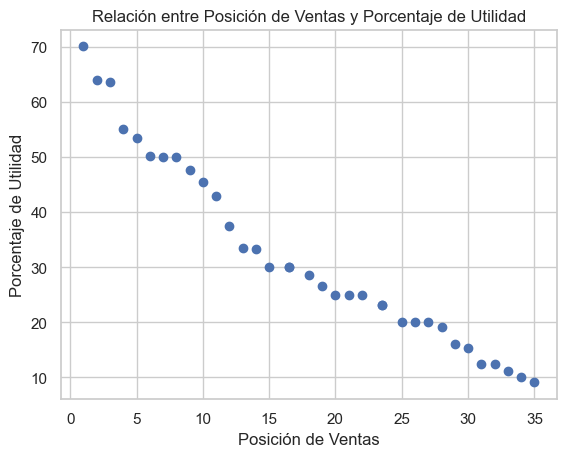

In [60]:
# Graficar la relación entre la posición de ventas y el porcentaje de utilidad
plt.scatter(TaskTwo['posicion de ventas'], TaskTwo['percentage'])
plt.xlabel('Posición de Ventas')
plt.ylabel('Porcentaje de Utilidad')
plt.title('Relación entre Posición de Ventas y Porcentaje de Utilidad')
plt.show()

In [61]:

# Cargar los datos
data = TaskTwo

# Dividir los datos en características (X) y variable objetivo (y)
X = data[['percentage', 'Product_Price']]
y = data['posicion de ventas']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular métricas de evaluación
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)


In [62]:
# Crear un nuevo dato para predecir el posicionamiento promedio de ventas
new_data = pd.DataFrame({
    'percentage': [60],
    'Product_Price': [300]
})

# Realizar la predicción para el nuevo dato
predicted_posicion_ventas = model.predict(new_data)

print('Posicionamiento promedio de ventas predicho:', predicted_posicion_ventas)
# Imprimir las métricas de evaluación
print("Coeficiente de determinación (R^2):", r2)
print("Error cuadrático medio (MSE):", mse)
print("Error absoluto medio (MAE):", mae)


Posicionamiento promedio de ventas predicho: [31.21402705]
Coeficiente de determinación (R^2): 0.9116991874260983
Error cuadrático medio (MSE): 3.290556811427436
Error absoluto medio (MAE): 1.6696701860446805


El coeficiente de determinación (R^2) de 0.911 indica que el modelo explica aproximadamente el 91% de la variabilidad en las ventas basado en las características utilizadas. Un valor cercano a 1 significa un buen ajuste del modelo a los datos.

El error cuadrático medio (MSE) de 3.29 representa el promedio de los errores al cuadrado entre las predicciones del modelo y los valores reales de las ventas. Un valor más bajo indica que el modelo tiene un menor error en las predicciones de ventas.

El error absoluto medio (MAE) de 1.66 es el promedio de los errores absolutos entre las predicciones del modelo y los valores reales de las ventas. Un valor más bajo indica que el modelo tiene un menor error absoluto en las predicciones de ventas.

En resumen, el modelo tiene un buen ajuste a los datos, con una alta capacidad de explicar la variabilidad en las ventas. Además, el modelo tiene un error cuadrático medio y un error absoluto medio relativamente bajos, lo que indica que las predicciones de ventas están cercanas a los valores reales en promedio.

Eso quiere decir que nuestro __patin del diablo__ va a aparecer entre el lugar 30 de ventas de 35 productos ( no le va a ir muy bien que digamos ... ) 

### ¿En que ciudad es más rentable inagurar una nueva tienda?

In [63]:
#crear un dataset llamado rentable que sea la union de sales_products y stores por la columna Store_ID
rentable = pd.merge(sales_products, stores, on='Store_ID')
rentable.head(3)

,Product_ID,Product_Name,Product_Category,Product_Cost,Product_Price,Sale_ID,Date,Store_ID,Units,Quarter,Store_Name,Store_City,Store_Location,Store_Open_Date
0,1,Action Figure,Toys,$9.99,$15.99,2,2017-01-01,28,1,1,Maven Toys Puebla 2,Puebla,Downtown,2011-04-01
1,1,Action Figure,Toys,$9.99,$15.99,171,2017-01-01,28,1,1,Maven Toys Puebla 2,Puebla,Downtown,2011-04-01
2,1,Action Figure,Toys,$9.99,$15.99,364,2017-01-01,28,1,1,Maven Toys Puebla 2,Puebla,Downtown,2011-04-01


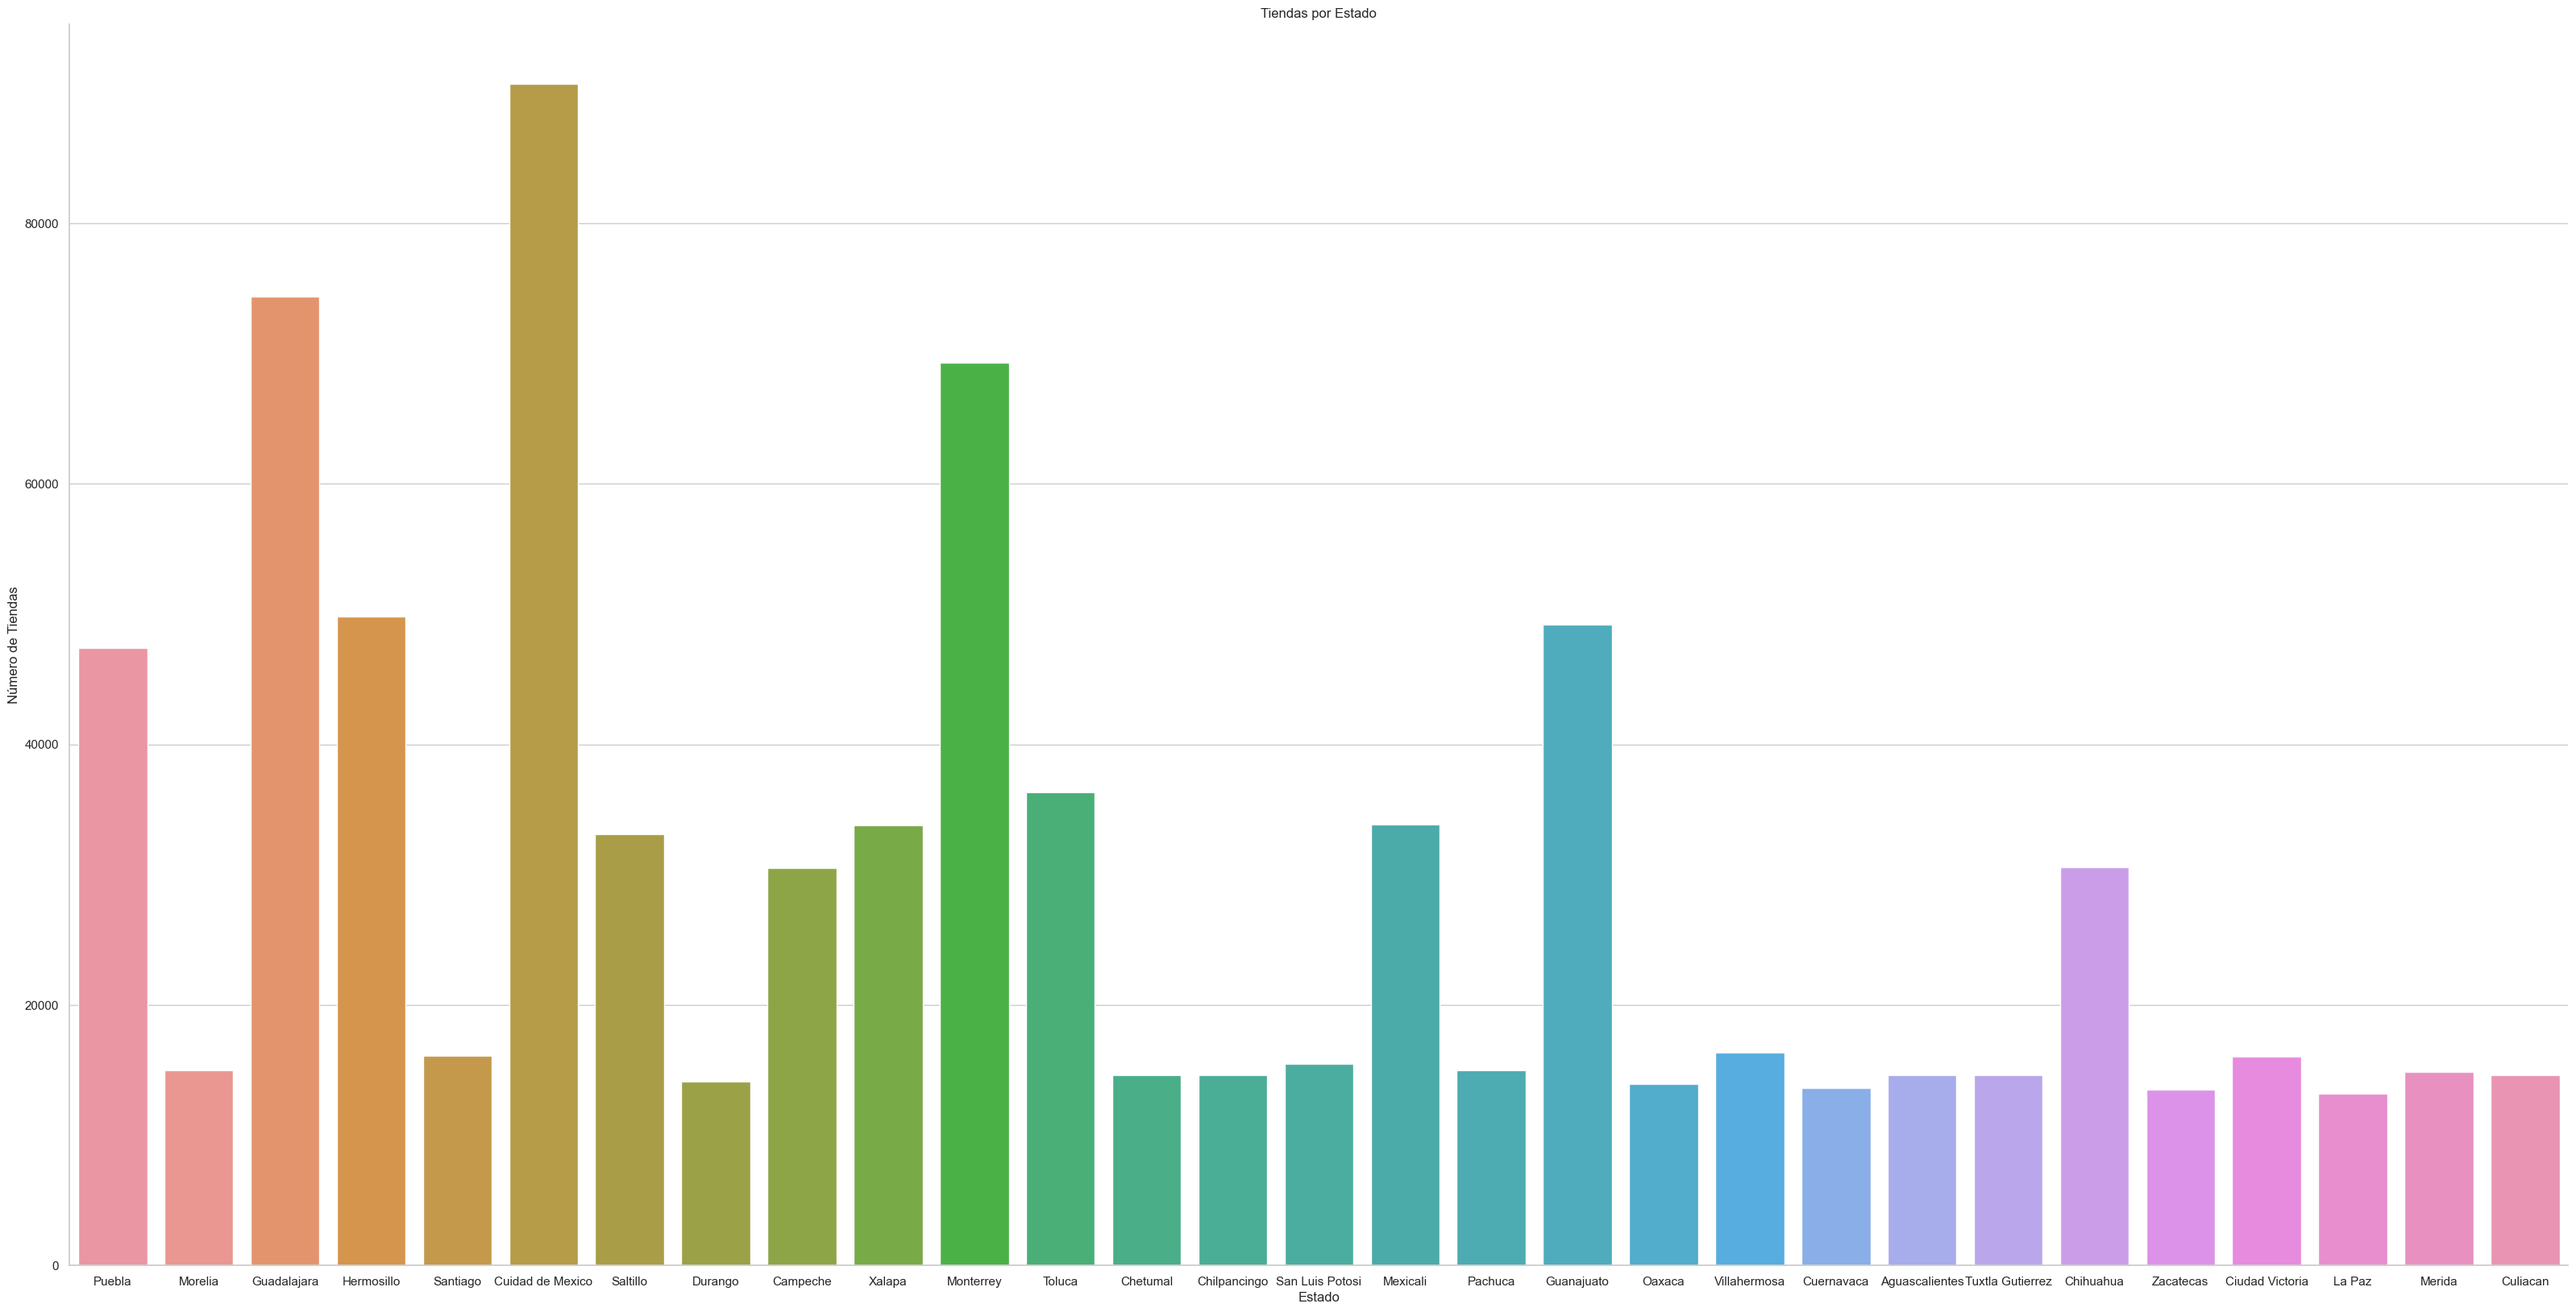

In [64]:
# graficar cuantas tiendas hay por estado

#ordenar de mayor a menor las tiendas por estado

plt.figure(figsize=(40, 20))
sns.countplot(x='Store_City', data=rentable)
plt.title('Tiendas por Estado')
plt.xlabel('Estado')
plt.ylabel('Número de Tiendas')

# Customize the plot appearance
sns.set(style='whitegrid')
sns.despine()

# Show the plot
plt.show()

Ciudad de México, Guadalajara y Monterrey son las que más tiendas tienen

In [65]:
#reemplazar $ por vacio en la columna Product_Cost y Product_Price
rentable['Product_Cost'] = rentable['Product_Cost'].str.replace('$', '')
rentable['Product_Price'] = rentable['Product_Price'].str.replace('$', '')

#pasar a numerico las columnas Product_Cost y Product_Price
rentable['Product_Cost'] = pd.to_numeric(rentable['Product_Cost'], errors='coerce')
rentable['Product_Price'] = pd.to_numeric(rentable['Product_Price'], errors='coerce')

#crear una columna nueva llamada ventas que sea el resultado de multiplicar las columnas Units y Product_Price
rentable['ventas'] = (rentable['Units']) * (rentable['Product_Price'])


#crear un dataset llamado estados que sea la agrupacion de rentable por Store_City y sumar las ventas
estados = rentable.groupby('Store_City')['ventas'].sum().reset_index(name='ventas')

#añadir a estados el numero de tiendas por estado
estados['numero de tiendas'] = rentable.groupby('Store_City')['Store_ID'].nunique().reset_index(name='numero de tiendas')['numero de tiendas']



/var/folders/zb/0l4s85s95rzbg13c3_fm6k540000gn/T/ipykernel_52404/327633055.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  rentable['Product_Cost'] = rentable['Product_Cost'].str.replace('$', '')
/var/folders/zb/0l4s85s95rzbg13c3_fm6k540000gn/T/ipykernel_52404/327633055.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  rentable['Product_Price'] = rentable['Product_Price'].str.replace('$', '')


In [66]:
estados.head(30)

,Store_City,ventas,numero de tiendas
0,Aguascalientes,239997.35,1
1,Campeche,517841.67,2
2,Chetumal,258919.35,1
3,Chihuahua,516713.04,2
4,Chilpancingo,242539.73,1
5,Ciudad Victoria,294803.99,1
6,Cuernavaca,221587.26,1
7,Cuidad de Mexico,1649492.01,4
8,Culiacan,251160.91,1
9,Durango,222318.78,1


In [67]:
#crear un dataframe llamado TaskThree que agrupe rentable por Store_Name y sume las ventas 
TaskThree = rentable.groupby('Store_Name')['ventas'].sum().reset_index(name='ventas')
#Añadir el estado de cada tienda
TaskThree['Store_City'] = rentable.groupby('Store_Name')['Store_City'].first().reset_index(name='Store_City')['Store_City']
#añadir el numero de ventas por tienda
TaskThree.head(10)
#añadir cuando se fundo cada tienda
TaskThree['Store_Start_Date'] = rentable.groupby('Store_Name')['Store_Open_Date'].first().reset_index(name='Store_Open_Date')['Store_Open_Date']

In [68]:
TaskThree.head(10)

,Store_Name,ventas,Store_City,Store_Start_Date
0,Maven Toys Aguascalientes 1,239997.35,Aguascalientes,2010-07-31
1,Maven Toys Campeche 1,311786.44,Campeche,2005-01-14
2,Maven Toys Campeche 2,206055.23,Campeche,2010-09-15
3,Maven Toys Chetumal 1,258919.35,Chetumal,2006-05-05
4,Maven Toys Chihuahua 1,248008.30,Chihuahua,2010-06-12
5,Maven Toys Chihuahua 2,268704.74,Chihuahua,2014-03-18
6,Maven Toys Chilpancingo 1,242539.73,Chilpancingo,2013-06-11
7,Maven Toys Ciudad Victoria 1,294803.99,Ciudad Victoria,2010-09-08
8,Maven Toys Ciudad de Mexico 1,433556.21,Cuidad de Mexico,2004-10-15
9,Maven Toys Ciudad de Mexico 2,554553.43,Cuidad de Mexico,2012-05-04


In [69]:
#seleccionar la fecha minima de sales por tienda
TaskThree['fecha minima'] = rentable.groupby('Store_Name')['Date'].min().reset_index(name='Date')['Date']

#seleccionar la fecha maxima de sales por tienda
TaskThree['fecha maxima'] = rentable.groupby('Store_Name')['Date'].max().reset_index(name='Date')['Date']

#seleccionar el numero de productos por tienda
TaskThree['numero de productos'] = rentable.groupby('Store_Name')['Product_ID'].nunique().reset_index(name='Product_ID')['Product_ID']

#seleccionar el numero de ventas por tienda
TaskThree['numero de ventas'] = rentable.groupby('Store_Name')['Product_ID'].count().reset_index(name='Product_ID')['Product_ID']

#seleccionar el numero de unidades vendidas por tienda
TaskThree['numero de unidades vendidas'] = rentable.groupby('Store_Name')['Units'].sum().reset_index(name='Units')['Units']

#agregar el id de la tienda
TaskThree['Store_ID'] = rentable.groupby('Store_Name')['Store_ID'].first().reset_index(name='Store_ID')['Store_ID']

In [70]:
#Cambiar la fecha de inicio de la tienda a datetime
TaskThree['Store_Start_Date'] = pd.to_datetime(TaskThree['Store_Start_Date'])

#Cambiar la fecha minima de ventas a datetime
TaskThree['fecha minima'] = pd.to_datetime(TaskThree['fecha minima'])

#Cambiar la fecha maxima de ventas a datetime
TaskThree['fecha maxima'] = pd.to_datetime(TaskThree['fecha maxima'])

#Calcular la antiguedad de la tienda
TaskThree['antiguedad'] = TaskThree['fecha maxima'] - TaskThree['Store_Start_Date']

#Calcular la antiguedad de la tienda en años
TaskThree['antiguedad'] = (TaskThree['fecha maxima'] - TaskThree['Store_Start_Date']) / np.timedelta64(1, 'Y')


#restar la fecha minima de ventas a la fecha maxima de ventas
TaskThree['duracion'] = TaskThree['fecha maxima'] - TaskThree['fecha minima']

#Calcular la duracion de la tienda en años
TaskThree['duracion'] = (TaskThree['fecha maxima'] - TaskThree['fecha minima']) / np.timedelta64(1, 'Y')


TaskThree.head(10)

,Store_Name,ventas,Store_City,Store_Start_Date,fecha minima,fecha maxima,numero de productos,numero de ventas,numero de unidades vendidas,Store_ID,antiguedad,duracion
0,Maven Toys Aguascalientes 1,239997.35,Aguascalientes,2010-07-31,2017-01-01,2018-09-30,35,14588,17865,24,8.167177,1.744047
1,Maven Toys Campeche 1,311786.44,Campeche,2005-01-14,2017-01-01,2018-09-30,35,17695,24556,10,13.708700,1.744047
2,Maven Toys Campeche 2,206055.23,Campeche,2010-09-15,2017-01-02,2018-09-30,35,12805,16277,26,8.041233,1.741309
3,Maven Toys Chetumal 1,258919.35,Chetumal,2006-05-05,2017-01-01,2018-09-30,35,14644,18965,12,12.405457,1.744047
4,Maven Toys Chihuahua 1,248008.30,Chihuahua,2010-06-12,2017-01-01,2018-09-30,35,13998,18070,23,8.301334,1.744047
5,Maven Toys Chihuahua 2,268704.74,Chihuahua,2014-03-18,2017-01-01,2018-09-30,35,16580,22326,38,4.536712,1.744047
6,Maven Toys Chilpancingo 1,242539.73,Chilpancingo,2013-06-11,2017-01-01,2018-09-30,30,14592,18327,35,5.303326,1.744047
7,Maven Toys Ciudad Victoria 1,294803.99,Ciudad Victoria,2010-09-08,2017-01-01,2018-09-30,30,16034,20501,25,8.060398,1.744047
8,Maven Toys Ciudad de Mexico 1,433556.21,Cuidad de Mexico,2004-10-15,2017-01-01,2018-09-30,35,24482,33479,9,13.957850,1.744047
9,Maven Toys Ciudad de Mexico 2,554553.43,Cuidad de Mexico,2012-05-04,2017-01-01,2018-09-30,30,29024,42757,31,6.406702,1.744047


In [71]:
# Importar la librería necesaria
from sklearn.preprocessing import LabelEncoder

# Crear una instancia de LabelEncoder
label_encoder = LabelEncoder()

# Aplicar la codificación a la columna Store_City
TaskThree['Store_City_encoded'] = label_encoder.fit_transform(TaskThree['Store_City'])

# Imprimir los resultados
print(TaskThree[['Store_City', 'Store_City_encoded']].head())


       Store_City  Store_City_encoded
0  Aguascalientes                   0
1        Campeche                   1
2        Campeche                   1
3        Chetumal                   2
4       Chihuahua                   3


In [72]:
# Crear el conjunto de características (X) y la variable objetivo (y)
X = TaskThree[['antiguedad', 'numero de productos', 'numero de ventas' , 'Store_City_encoded']]
y = TaskThree['ventas']

# Dividir los datos en conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [73]:
# Escalar las características
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [74]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train_scaled, y_train)


KNeighborsRegressor(n_neighbors=3)

In [75]:
y_pred = knn.predict(X_test_scaled)


In [76]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Error cuadrático medio (MSE):', mse)
print('Coeficiente de determinación (R^2):', r2)


Error cuadrático medio (MSE): 1767348037.2588642
Coeficiente de determinación (R^2): 0.6525374335481439


In [77]:
import numpy as np
from sklearn.inspection import permutation_importance

# Perform permutation importance
result = permutation_importance(knn, X_test_scaled, y_test, n_repeats=10, random_state=42)

# Get feature importance scores
importance_scores = result.importances_mean

# Get feature names
feature_names = X.columns

# Print feature importance scores
for feature, importance in zip(feature_names, importance_scores):
    print(f'Importancia de {feature}: {importance}')


Importancia de antiguedad: 0.03425301791178977
Importancia de numero de productos: 0.06550114467134352
Importancia de numero de ventas: 0.8978847902301158
Importancia de Store_City_encoded: 0.00530827785518404


Estos nuevos valores de importancia indican que tanto la antigüedad como el número de productos tienen una influencia moderada, las ciudades y la antiguedad no tienen mucha importancia mientras que el número de ventas es el factor más relevante en la predicción de las ventas.

Eso quiere decir que no importa en que estado se abra una tienda, importa más que tengan más numeros de ventas y mejor surtido de productos

###  ¿Cual es la temporada con más ventas?

In [78]:

# Convertir la columna de fecha a datetime y extraer el trimestre
sales['Quarter'] = pd.to_datetime(sales['Date']).dt.quarter

# Agrupar los datos por trimestre y sumar las ventas
quarterly_sales = sales.groupby('Quarter')['Units'].sum()

print('De quartely_sales, ¿Cual es el trimestre con mas ventas?')

# Imprimir el resultado
print(quarterly_sales)

TaskFour = sales



De quartely_sales, ¿Cual es el trimestre con mas ventas?
Quarter
1    295320
2    334909
3    295259
4    165077
Name: Units, dtype: int64


In [79]:
#agregar products a TaskFour por la columna Product_ID
TaskFour = pd.merge(TaskFour, products, on='Product_ID')

#agregar inventory a TaskFour por la columna Product_ID
TaskFour = pd.merge(TaskFour, inventory, on='Product_ID')

In [80]:
TaskFour

,Sale_ID,Date,Store_ID_x,Product_ID,Units,Quarter,Product_Name,Product_Category,Product_Cost,Product_Price,Utilities,percentage,utilidad_nivel,Store_ID_y,Stock_On_Hand
0,1,2017-01-01,24,4,1,1,Chutes & Ladders,Games,9.99,12.99,3.0,23.094688,bajo,1,6
1,1,2017-01-01,24,4,1,1,Chutes & Ladders,Games,9.99,12.99,3.0,23.094688,bajo,4,2
2,1,2017-01-01,24,4,1,1,Chutes & Ladders,Games,9.99,12.99,3.0,23.094688,bajo,6,14
3,1,2017-01-01,24,4,1,1,Chutes & Ladders,Games,9.99,12.99,3.0,23.094688,bajo,7,17
4,1,2017-01-01,24,4,1,1,Chutes & Ladders,Games,9.99,12.99,3.0,23.094688,bajo,8,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40635898,829220,2018-09-30,22,28,3,3,Playfoam,Art & Crafts,3.99,10.99,7.0,63.694268,medio,46,1
40635899,829220,2018-09-30,22,28,3,3,Playfoam,Art & Crafts,3.99,10.99,7.0,63.694268,medio,47,4
40635900,829220,2018-09-30,22,28,3,3,Playfoam,Art & Crafts,3.99,10.99,7.0,63.694268,medio,48,1
40635901,829220,2018-09-30,22,28,3,3,Playfoam,Art & Crafts,3.99,10.99,7.0,63.694268,medio,49,10
